#### ARIMA:
AR: Auto Regression
I: Integrated
MA: Moving Average
1. check data for stationary
by some hypothesis testing: Dickey Fuller test

Hi: unit root <1 => Data is stationary

Ho: unit root =1 => Data is not stationary


for stationary data:
1. mean should be constant
2. sd should also be constant



if p < 0.05 h1 accept  
   p >0.05 ho accept

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Time_Series_Analysis/main/passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [39]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [40]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [41]:
df.dropna(axis=0,inplace = True)

In [42]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [44]:
df['Month'] = pd.to_datetime(df['Month'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [46]:
df.set_index('Month', inplace = True)

In [47]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

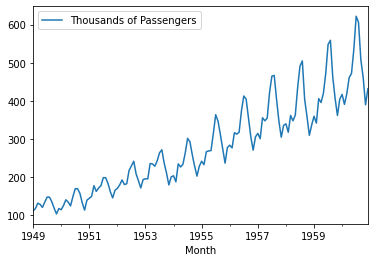

In [48]:
df.plot()

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics: {}".format(result[0]))
    print("p value: {}".format(result[1]))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [51]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060463
p value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [52]:
## Use Techniques Differencing
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [53]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [55]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699923
p value: 0.054213290283826474
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [58]:
## Use Techniques Differencing
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [59]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468516
p value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [61]:
### 12 months 
## Use Techniques Differencing
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [63]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [64]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

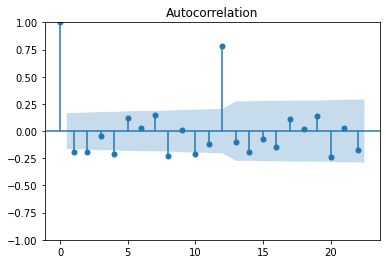

In [65]:
acf = plot_acf(df["Passengers Second Difference"].dropna())

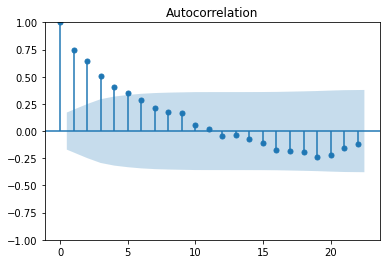

In [66]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())

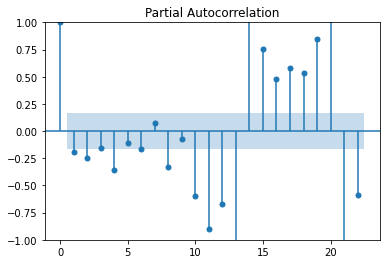

In [70]:
result = plot_pacf(df["Passengers Second Difference"].dropna())

c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


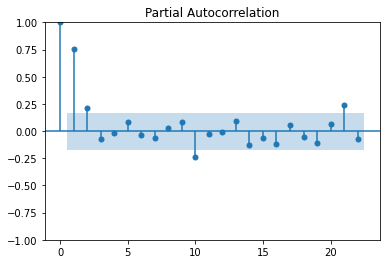

In [68]:
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [71]:
from datetime import datetime, timedelta

In [72]:
train_df_end = datetime(1955, 12, 1)
test_df_end = datetime(1960, 12, 1)

In [73]:
train_data = df[: train_df_end]
test_data = df[train_df_end+timedelta(days=1): test_df_end]

In [91]:
train_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [90]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


In [79]:
from statsmodels.tsa.arima.model import ARIMA

In [80]:
train_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [95]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order = (10,2,0))

c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [96]:
model_Arima = model_ARIMA.fit()

In [97]:
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sun, 26 Feb 2023   AIC                            736.477
Time:                             21:43:44   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [99]:
pred = model_Arima.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data['Thousands of Passengers']- pred

In [100]:
pred

1956-01-01    300.183612
1956-02-01    309.478354
1956-03-01    316.443013
1956-04-01    307.827542
1956-05-01    318.544231
1956-06-01    348.922080
1956-07-01    366.020285
1956-08-01    346.567532
1956-09-01    332.120967
1956-10-01    307.734753
1956-11-01    311.623910
1956-12-01    339.828195
1957-01-01    349.840403
1957-02-01    356.098231
1957-03-01    350.687825
1957-04-01    350.080460
1957-05-01    361.157690
1957-06-01    381.216513
1957-07-01    382.319371
1957-08-01    372.852576
1957-09-01    364.110093
1957-10-01    356.108921
1957-11-01    371.293786
1957-12-01    385.323593
1958-01-01    392.077834
1958-02-01    391.405847
1958-03-01    388.404576
1958-04-01    391.572853
1958-05-01    402.448076
1958-06-01    413.255680
1958-07-01    410.853411
1958-08-01    407.670540
1958-09-01    402.486331
1958-10-01    406.089143
1958-11-01    418.125310
1958-12-01    426.012371
1959-01-01    429.205577
1959-02-01    427.352227
1959-03-01    428.150983
1959-04-01    432.790842


In [101]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478354
1956-03-01      0.556987
1956-04-01      5.172458
1956-05-01     -0.544231
1956-06-01     25.077920
1956-07-01     46.979715
1956-08-01     58.432468
1956-09-01     22.879033
1956-10-01     -1.734753
1956-11-01    -40.623910
1956-12-01    -33.828195
1957-01-01    -34.840403
1957-02-01    -55.098231
1957-03-01      5.312175
1957-04-01     -2.080460
1957-05-01     -6.157690
1957-06-01     40.783487
1957-07-01     82.680629
1957-08-01     94.147424
1957-09-01     39.889907
1957-10-01     -9.108921
1957-11-01    -66.293786
1957-12-01    -49.323593
1958-01-01    -52.077834
1958-02-01    -73.405847
1958-03-01    -26.404576
1958-04-01    -43.572853
1958-05-01    -39.448076
1958-06-01     21.744320
1958-07-01     80.146589
1958-08-01     97.329460
1958-09-01      1.513669
1958-10-01    -47.089143
1958-11-01   -108.125310
1958-12-01    -89.012371
1959-01-01    -69.205577
1959-02-01    -85.352227
1959-03-01    -22.150983
1959-04-01    -36.7

<AxesSubplot:ylabel='Density'>

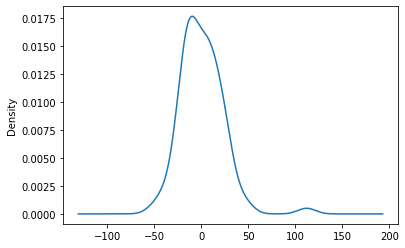

In [102]:
model_Arima.resid.plot(kind = 'kde')

In [104]:
test_data['Predicted_ARIMA']  = pred

c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

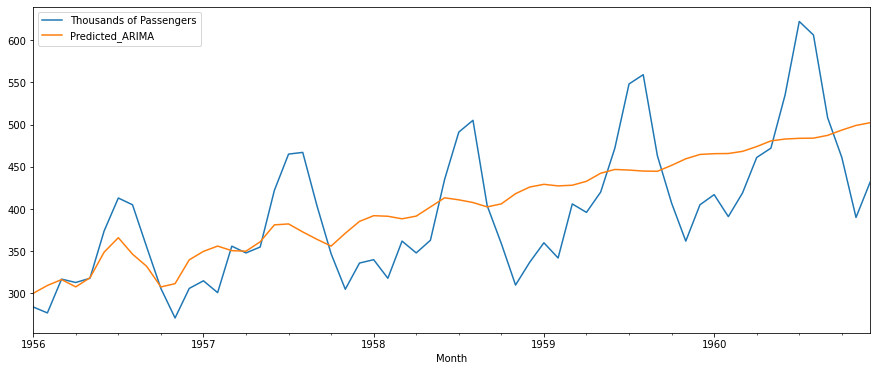

In [105]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA' ]].plot(figsize = (15,6))

In [106]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612
1956-02-01,277.0,-7.0,-13.0,44.0,309.478354
1956-03-01,317.0,40.0,47.0,50.0,316.443013
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542
1956-05-01,318.0,5.0,9.0,48.0,318.544231
1956-06-01,374.0,56.0,51.0,59.0,348.922080
1956-07-01,413.0,39.0,-17.0,49.0,366.020285
1956-08-01,405.0,-8.0,-47.0,58.0,346.567532
1956-09-01,355.0,-50.0,-42.0,43.0,332.120967


In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [108]:
model_sarimax = SARIMAX(train_data['Thousands of Passengers'], order = (0,2,0), seasonal_order = (1,0,1,12))

c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [109]:
model_sarimax_fit = model_sarimax.fit()

In [110]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(0, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -346.677
Date:                              Sun, 26 Feb 2023   AIC                            699.354
Time:                                      21:55:57   BIC                            706.575
Sample:                                  01-01-1949   HQIC                           702.253
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9227      0.065     14.282      0.000       0.796       1.049
ma.S.L12      -0.3372      0.150     -2.253      0.024      -0.631      -0.044
sigma2       228.1795     38.404      5.942      0.000     152.909     303.450
===================================================================================
Ljung-Box (L1) (Q):                  22.39   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.00   Prob(JB):                         0.82
Heteroskedasticity (H):               2.20   Skew:                            -0.05
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612
1956-02-01,277.0,-7.0,-13.0,44.0,309.478354
1956-03-01,317.0,40.0,47.0,50.0,316.443013
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542
1956-05-01,318.0,5.0,9.0,48.0,318.544231


In [112]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [113]:
pred_sarima = model_sarimax_fit.predict(start =pred_start_date, end = pred_end_date)

residual_s = test_data['Thousands of Passengers'] -pred_sarima

<AxesSubplot:xlabel='Month'>

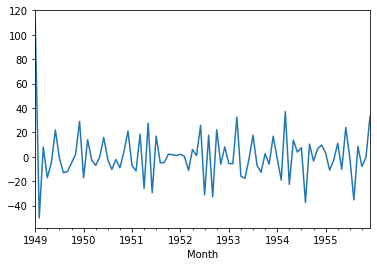

In [114]:
model_sarimax_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

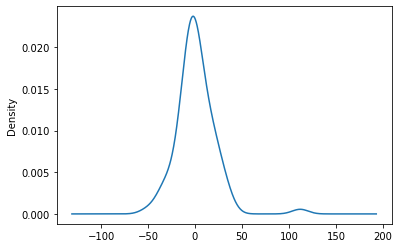

In [115]:
model_sarimax_fit.resid.plot(kind = 'kde')

In [116]:
pred_sarima

1956-01-01     305.944583
1956-02-01     317.259901
1956-03-01     369.136602
1956-04-01     387.726726
1956-05-01     408.840698
1956-06-01     462.420952
1956-07-01     519.977059
1956-08-01     528.516919
1956-09-01     517.549666
1956-10-01     506.458816
1956-11-01     496.451449
1956-12-01     547.185763
1957-01-01     585.873884
1957-02-01     609.218235
1957-03-01     669.988447
1957-04-01     700.045238
1957-05-01     732.430776
1957-06-01     794.772850
1957-07-01     860.783431
1957-08-01     881.566876
1957-09-01     884.351169
1957-10-01     887.021419
1957-11-01     890.691396
1957-12-01     950.407530
1958-01-01     999.008680
1958-02-01    1033.452182
1958-03-01    1102.428407
1958-04-01    1143.065457
1958-05-01    1185.851233
1958-06-01    1256.277811
1958-07-01    1330.089309
1958-08-01    1362.169871
1958-09-01    1377.642672
1958-10-01    1393.010246
1958-11-01    1409.300265
1958-12-01    1477.303896
1959-01-01    1535.051767
1959-02-01    1579.736420
1959-03-01  

In [117]:
test_data['Pred_sarmax']=pred_sarima

c:\users\preeti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

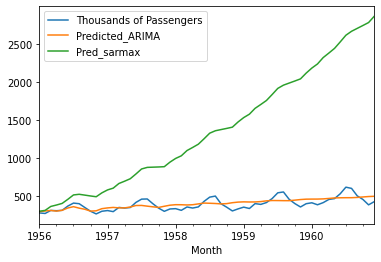

In [118]:
test_data [['Thousands of Passengers','Predicted_ARIMA','Pred_sarmax']].plot()